# **Project Name**    - Online Retail Customer Segmentation




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Author - Balaji J**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/balaji-89/Online_Retail_Customer_Segmentation/tree/main/Solution


# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [324]:
# Import Libraries
# Import Libraries
# Import Libraries# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings


#text preprocessing libraries
import contractions
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer



from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer


#avoid warnings
warnings.filterwarnings("ignore")




### Dataset Loading

In [325]:
# Load Dataset


def load_data(path):
    ''' 
    Description : It featches the csv data from the specified location 
                  and returns it as Dataframe object

    Parameters : 
      'path' - Holding path of the xlsx data located.
    '''
    return pd.read_csv(path)


#loading data
df = load_data('../Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [326]:
df_copy = df.copy(deep = True)
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [327]:
# Dataset First Look
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [328]:
# Dataset Rows & Columns count
print("Total Rows: ", df.shape[0])
print("Total Columns: ", df.shape[1])

Total Rows:  7787
Total Columns:  12


### Dataset Information

In [329]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [330]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

0

#### Missing Values/Null Values

In [331]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0, 0.5, 'Total Number of NaN values')

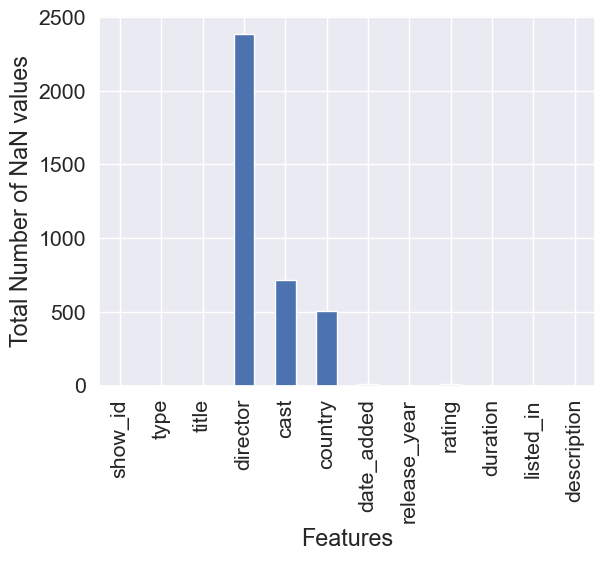

In [332]:
# Visualizing the missing values


df.isnull().sum().plot(kind= 'bar')
plt.xlabel('Features')
plt.ylabel("Total Number of NaN values")


### What did you know about your dataset?

This is a Unsupervised machine project which means we don't have any target variable. This dataset contains 12 features and 7787 observations. Initially it had some duplicated observations and I removed that.
This dataset contains movies and series details. And it has some categorical, Text (Description), and Numbers too. Finally there is four features with NaN values director, cast, country and date_added

## ***2. Understanding Your Variables***

In [333]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [334]:
#Categorical Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id : Unique ID and it is not useful much.
type : This describes whether the particular observation is series or a movie
title : This is the title of the movie or show
director : Name of the director
cast : cast information
country: Name of the country where the movie/series are belongs to.
date_added : Date is added in Netflix
release_year : the date it was actually released.
rating : Tv rating of the show
.....


### Check Unique Values for each variable.

In [335]:
# Check Unique Values for each variable.

#Calculaing unique values for most continous cols might not give any insight. Sometime I may want to display 
#unique values of only catgorical/object dtypes so I created function here.

def unique_counts(df1):
   for i in df1.columns:
       count = df1[i].nunique()
       print(i, ": ", count)



In [336]:
#printing unique value of only object cols
unique_counts(df)

show_id :  7787
type :  2
title :  7787
director :  4049
cast :  6831
country :  681
date_added :  1565
release_year :  73
rating :  14
duration :  216
listed_in :  492
description :  7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [337]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [338]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6672,s6673,TV Show,The Minions of Midas,Mateo Gil,"Luis Tosar, Marta Belmonte, Guillermo Toledo, ...",Spain,"November 13, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A millionaire publisher gets a blackmail note ...
3937,s3938,Movie,Maria,Pedring A. Lopez,"Cristine Reyes, Germaine De Leon, KC Montero, ...",Philippines,"May 17, 2019",2019,TV-MA,90 min,"Action & Adventure, International Movies",An ex-assassin tries to leave her dark past be...
6813,s6814,TV Show,The Repair Shop,NaN,NaN,United Kingdom,"December 1, 2020",2018,TV-PG,1 Season,"British TV Shows, Reality TV",Expert artisans restore timeworn family heirlo...
7252,s7253,Movie,True: Tricky Treat Day,NaN,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",Canada,"September 20, 2019",2019,TV-Y,24 min,Children & Family Movies,It's up to True and her friends to save the da...
2044,s2045,TV Show,Ever After High,NaN,"Jonquil Goode, Karen Strassman, Audu Paden, Ju...",Canada,"August 6, 2020",2016,TV-Y7,5 Seasons,Kids' TV,The kids of fairy-tale characters attend a sch...


In [339]:
# Write your code to make your dataset analysis ready.

#changing date_added feature into pandas datetime

def handle_date_added_feature(date_added_values):
    fin_date = []
    for date in date_added_values:
        if pd.isna(date):
            fin_date.append(np.nan)
        else:
            #extracting day
            day = date.split()[1]
            day = int(day[:-1])
            #extracting month
            month = date.split()[0]
            month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
            month =  month_map[month]
            #extracting year
            year = date.split()[-1]
            fin_date.append(f'{year}-{month}-{day}')
    #returning as datetime
    return pd.to_datetime(fin_date)
   


In [340]:
df['date_added'] =  handle_date_added_feature(df.date_added)


In [341]:
df['cast'] = df['cast'].apply(lambda x : np.nan if pd.isna(x) else x.split(','))

### What all manipulations have you done and insights you found?

This is unsupervised problem, so we going to use most of the features for EDA and our goal is to cluster based on the text features and I not going to spend much time in imputing Missing values and this wrangling I converted the date_added feature to pandas dataframe to use that feature effectively. Finally I changed the listed_in and cast to list so that we can use that in EDA little more easily.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

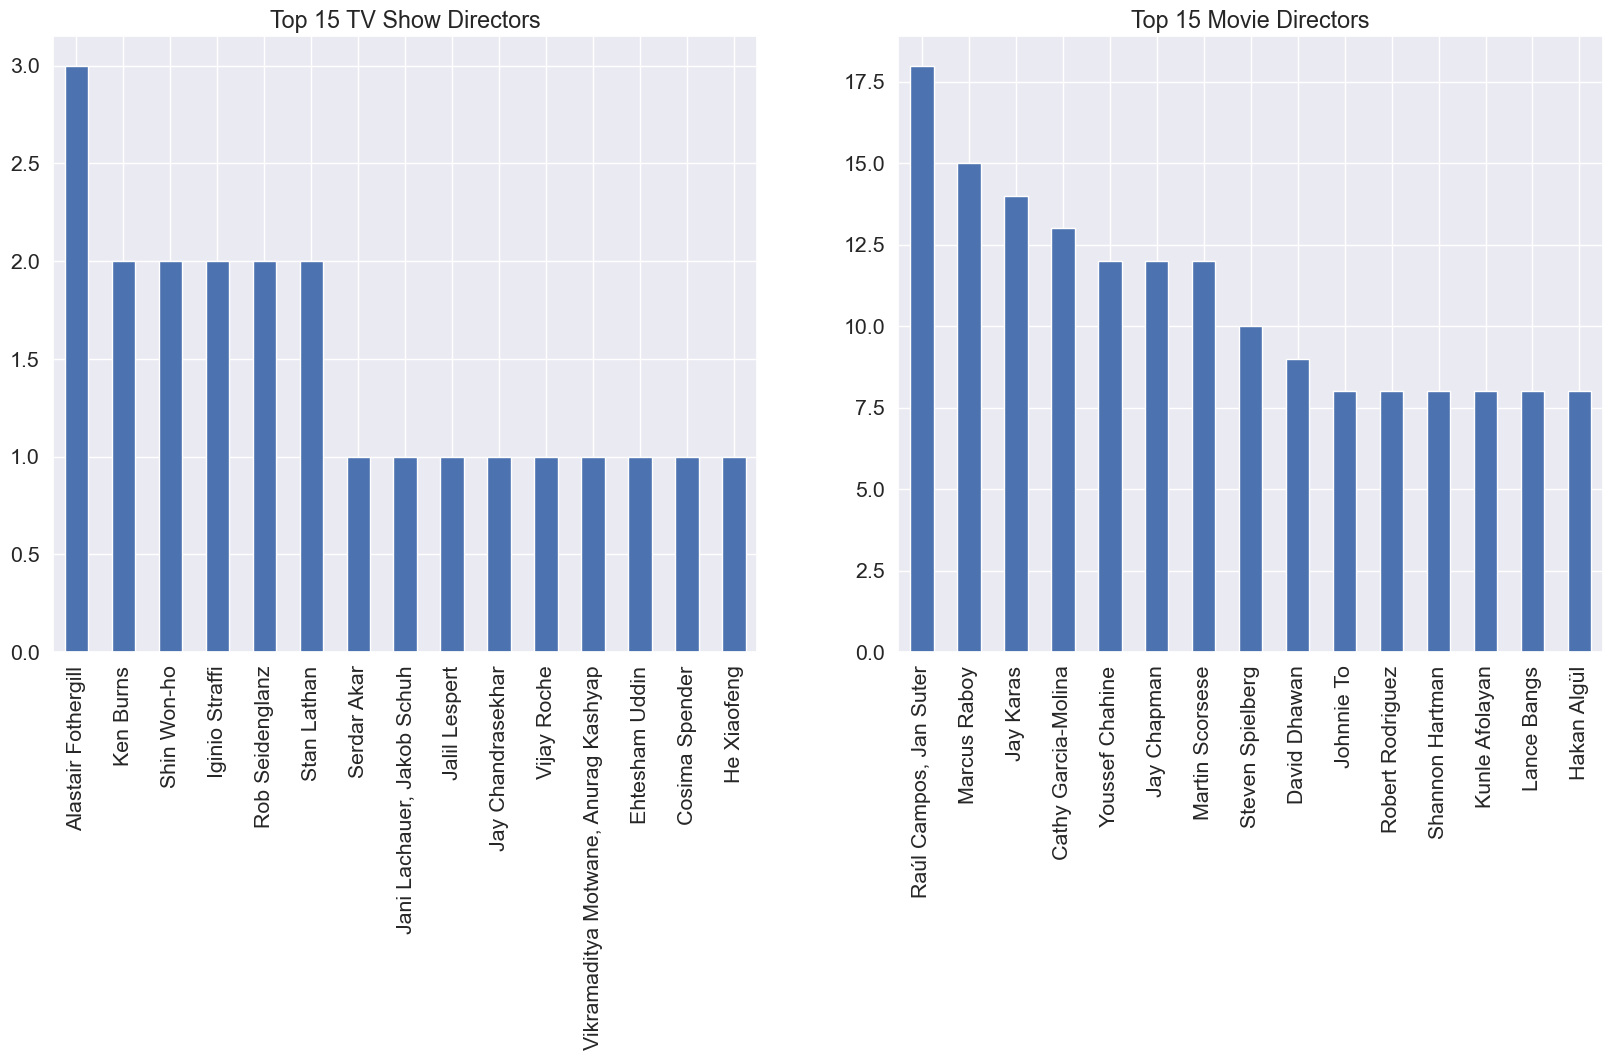

In [342]:
# Chart - 1 visualization code
tv_show = df[df.type == 'TV Show']
movie = df[df.type == 'Movie']


fig, (ax1, ax2) = plt.subplots(1,2)
tv_show.director.value_counts()[:15].plot(kind='bar',ax = ax1,title='Top 15 TV Show Directors',figsize = (20,8))
movie.director.value_counts()[:15].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Directors',figsize = (20,8))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is directors name and on y-axis it is count of their their movies/Tvshows in our dataset.

##### 2. What is/are the insight(s) found from the chart?

Alastair Fothergill directed most TV shows in our dataset with total count of 3 TV Shows. Raul Campos is the directed most films in our Movie category with the total movie count of 18.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These directors must be talented directors as the producers, there should be more fan base for these directors so Netflix can tieup with them to do a project only for Netflix, so that Netflix can make more money from that and their is no need to pay for the rights too.

#### Chart - 2

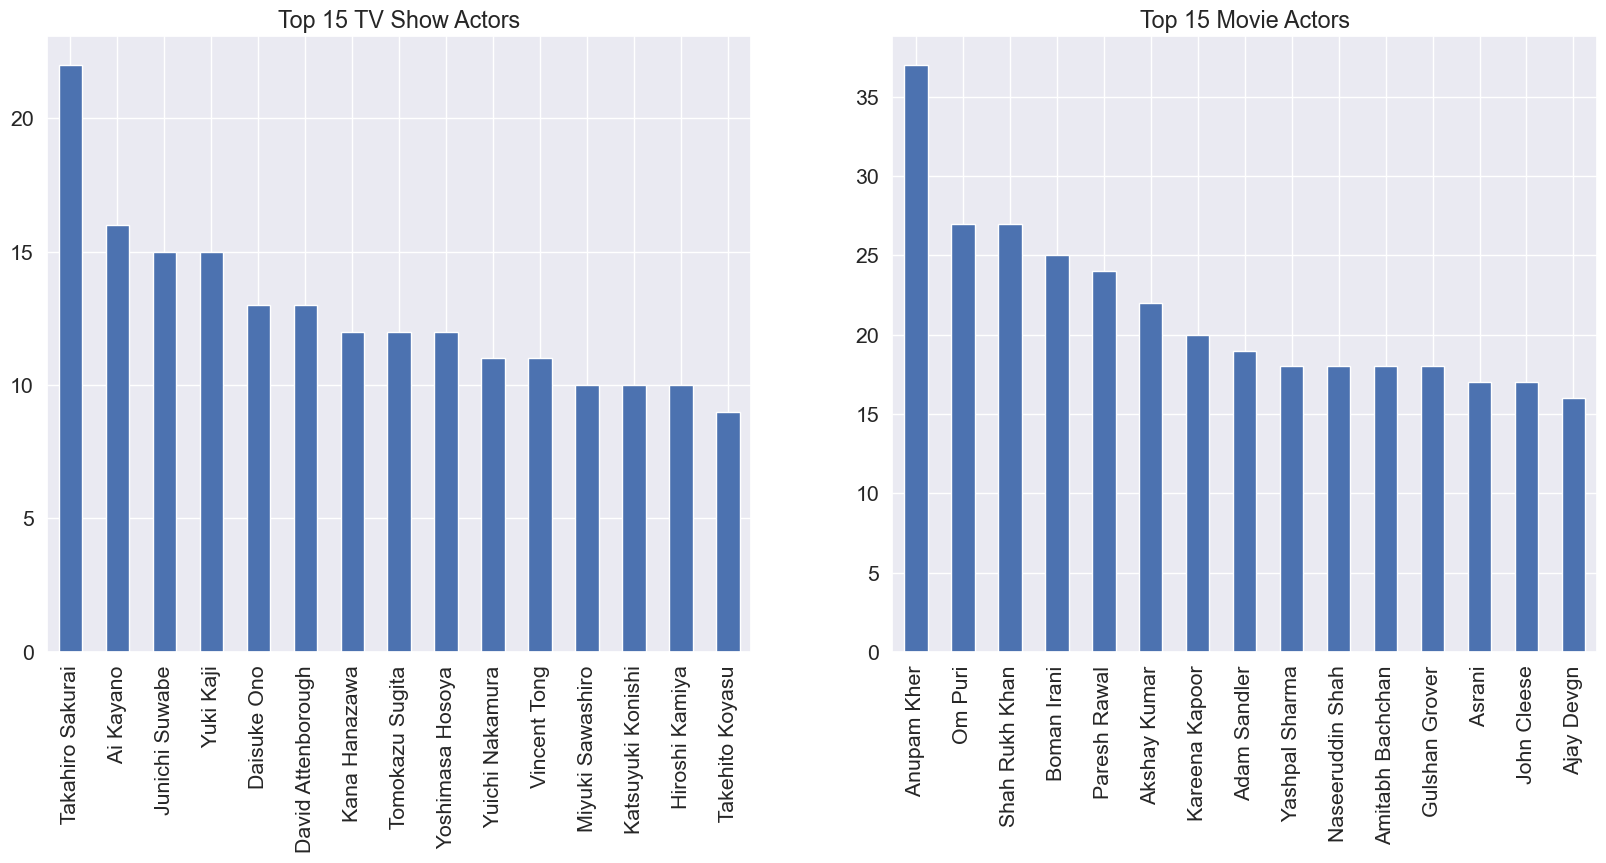

In [343]:
# Chart - 2 visualization code
tv_show_cst = []
for obs in tv_show.iterrows():
    if type(obs[1]['cast']) is list:
        tv_show_cst.extend(obs[1]['cast'])

movie_cst = []
for obs in movie.iterrows():
    if type(obs[1]['cast']) is list:
        movie_cst.extend(obs[1]['cast'])


fig, (ax1, ax2) = plt.subplots(1,2)
pd.Series(tv_show_cst).value_counts()[:15].plot(kind='bar',ax = ax1,title='Top 15 TV Show Actors',figsize = (20,8))
pd.Series(movie_cst).value_counts()[:15].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Actors',figsize = (20,8))
plt.show()

del tv_show_cst,movie_cst


##### 1. Why did you pick the specific chart?

Answer Here. I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is actors name and on y-axis it is count of their movies/Tvshows in our dataset.

##### 2. What is/are the insight(s) found from the chart?

Takahiro Sakurai acted most TV shows in our dataset with total count of 25 TV Shows. Anupam Kher is the acted most films in our Movie category with the total movie count of 32.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No business insights from the above chart

#### Chart - 3

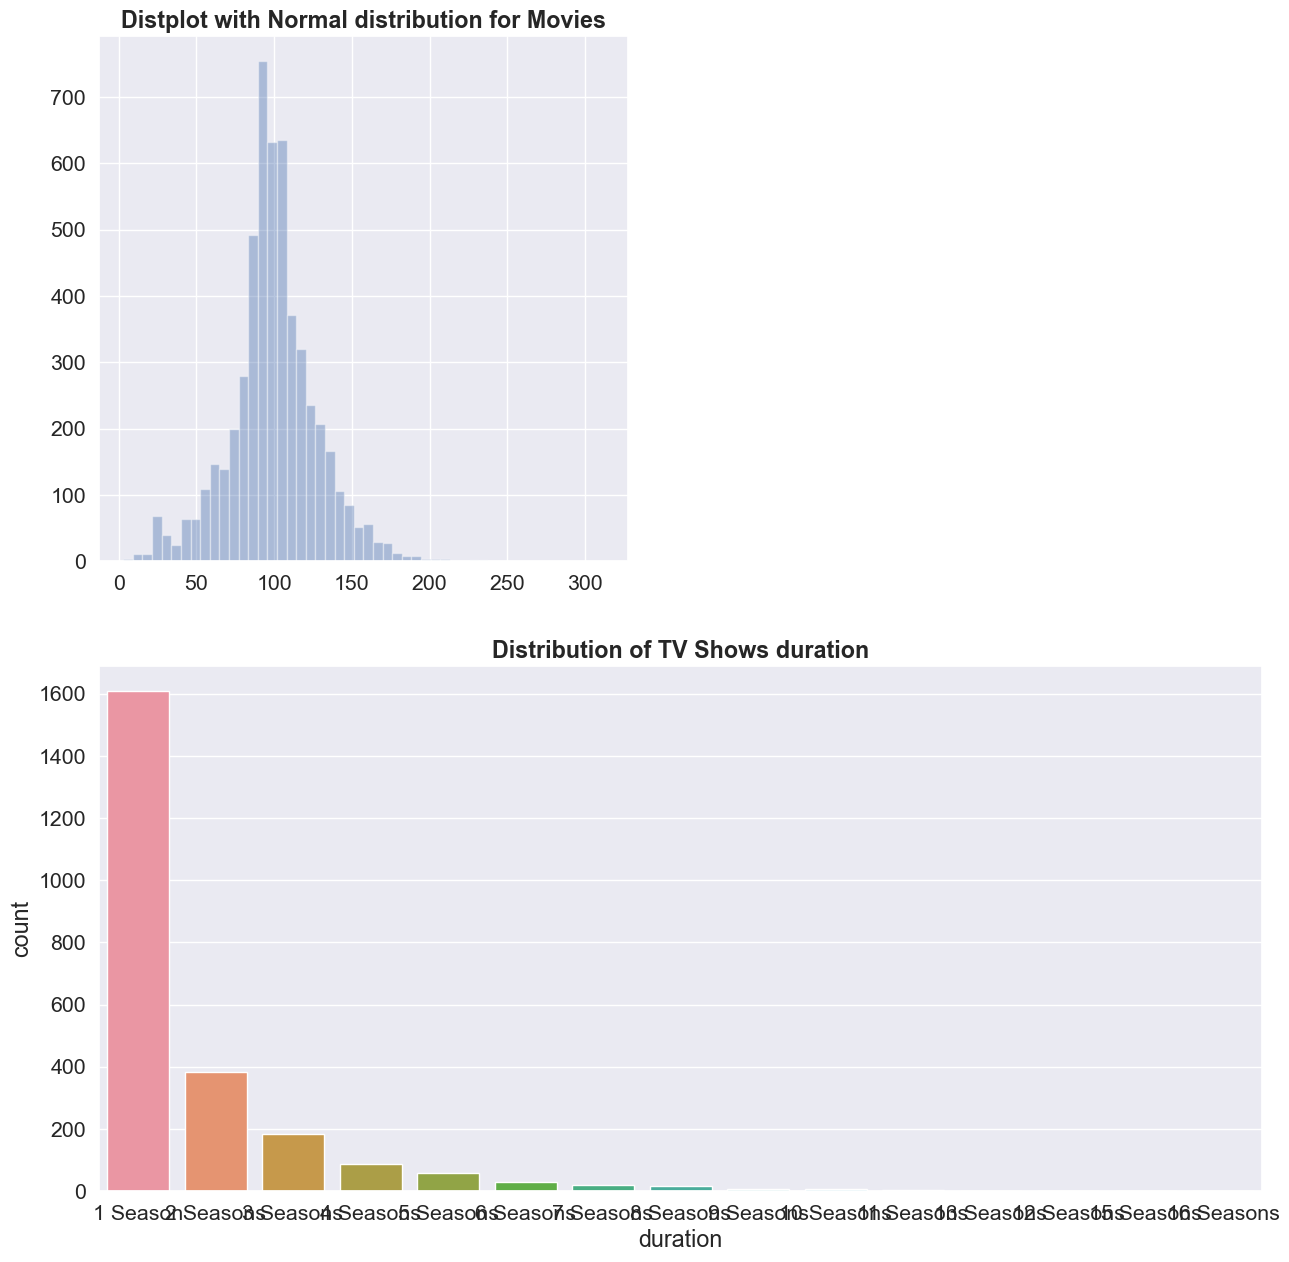

In [344]:
# Chart - 3 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False)
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")

#Checking the distribution of TV SHOWS
plt.subplot(2,1,2)
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)
plt.show()

##### 1. Why did you pick the specific chart?

I used histogram to find the distribution between movie and its duration and I used bar-graph to find the distribution between Tv_show and its duration


##### 2. What is/are the insight(s) found from the chart?

Most TV shows in our dataset is released in only one season almost 1600 and Most films released, has 800 minutes duration and it is normaly distributed.

#### Chart - 4

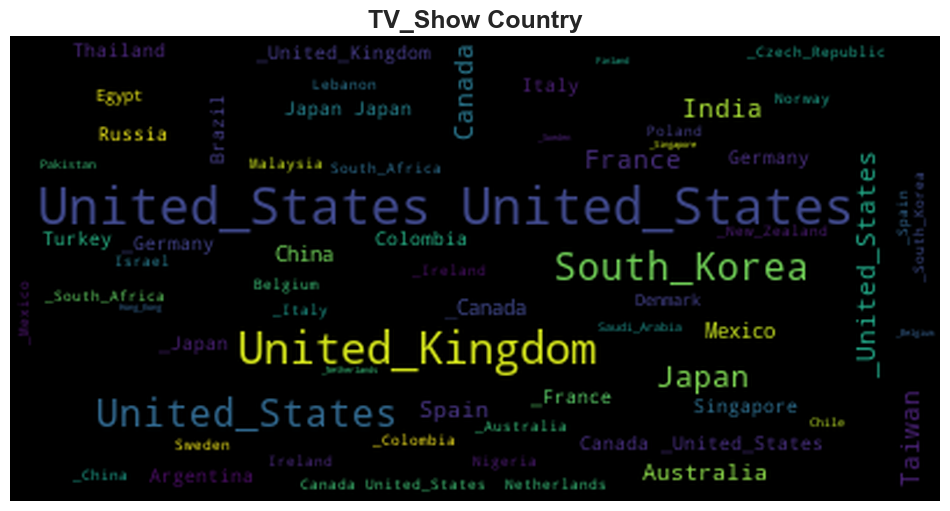

In [345]:
# Chart - 4 visualization code
from wordcloud import WordCloud, STOPWORDS



#Checking the distribution of TV SHOWS
df_word_cloud = tv_show['country'].dropna()
text = " ".join([word.strip().replace(' ','_') for word in df_word_cloud])
# Create stopword list:
stopwords = set(STOPWORDS)        #stopwords set is used to remove these common words from the text before generating the word cloud.
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("off")
plt.title('TV_Show Country', fontsize=18, fontweight='bold')
plt.show()




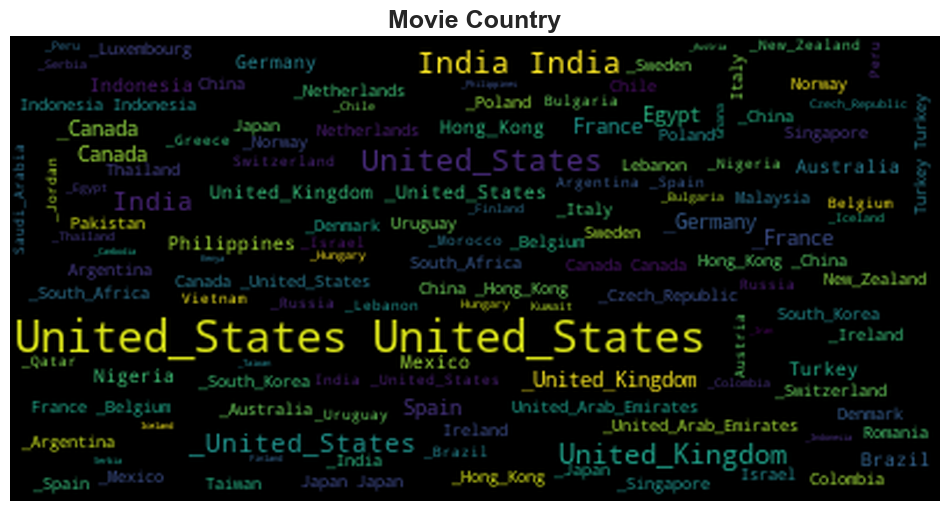

In [346]:
df_word_cloud = movie['country'].dropna()
text = " ".join([word.strip().replace(' ','_') for word in df_word_cloud])
# Create stopword list:
stopwords = set(STOPWORDS)        #stopwords set is used to remove these common words from the text before generating the word cloud.
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("off")
plt.title('Movie Country', fontsize=18, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

It is the fancy way to find the most number of repeated data/string. It differentiate category by its frequency using  size of font which represents that category.

##### 2. What is/are the insight(s) found from the chart?

Netflix has more number of TV_shows and Movies belongs to United States, we could guess this easily as Netflix belongs to America so It would be their first market preference.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having more movies and TV_show from United States is actually good for Netflix because as it from United States it should be an English content, and we know that many contry's people know English as their secondary languaage, so it would be become biggest profit for Netflix has they can make the same content available for other countries. So without making any addtional efforts they can make money from other country citizens too because of the language and the quality of the content.

#### Chart - 5

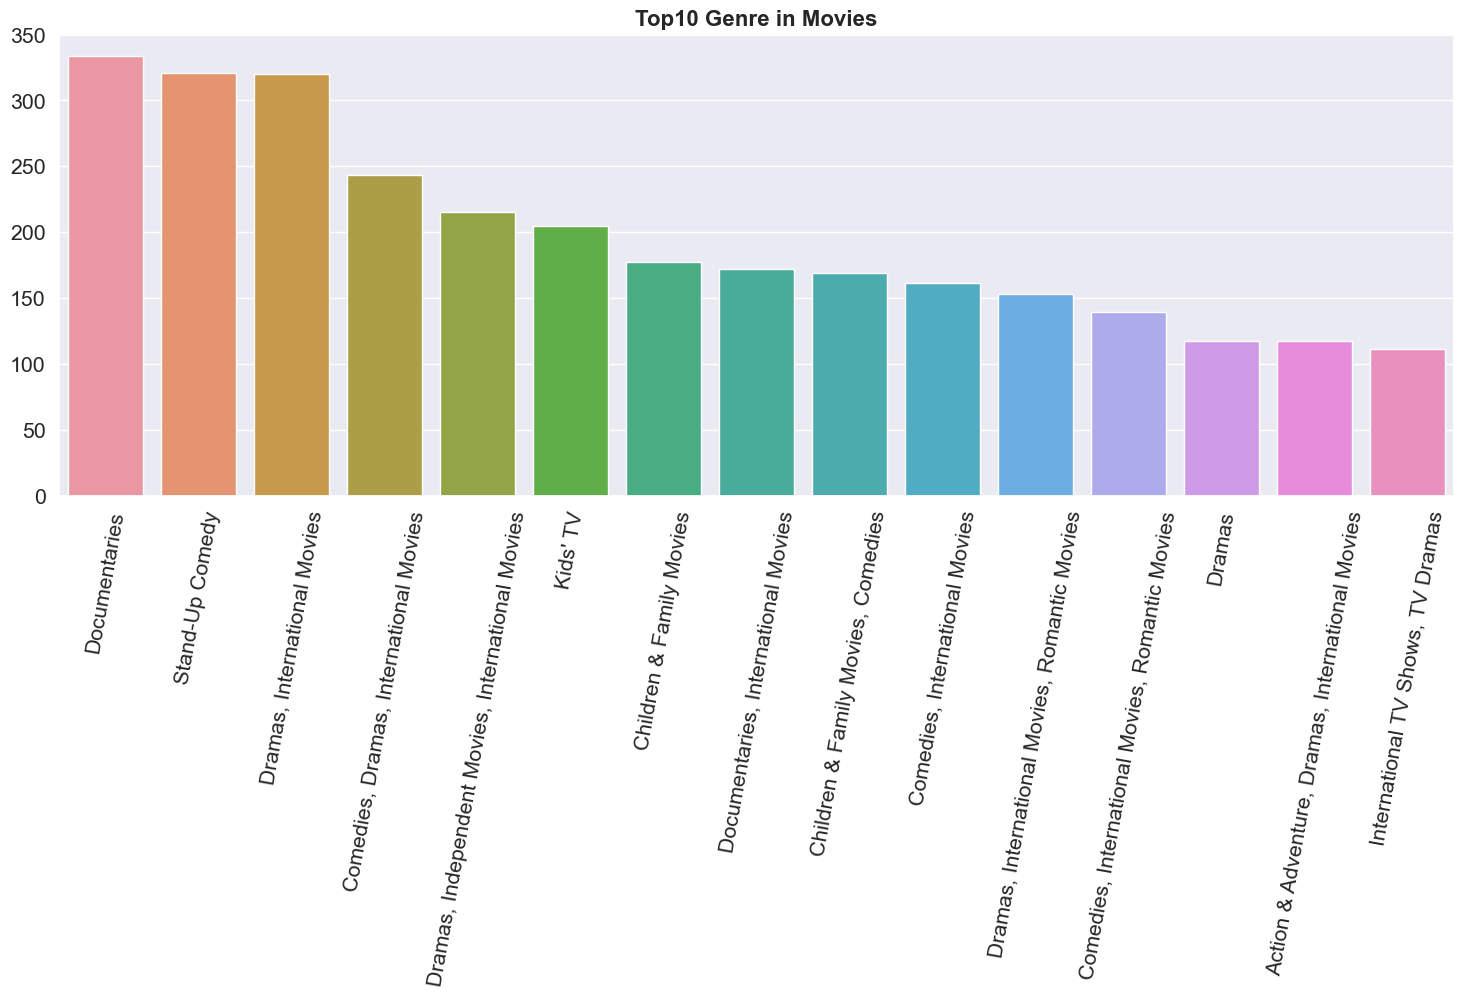

In [347]:
# Chart - 5 visualization code

# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values)
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here. I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is Genre and on y-axis it is count of movies/Tv Shows.

##### 2. What is/are the insight(s) found from the chart?

The Documentaries, Stand_up comedy and Dramas,International Movies is very famous and most contents available in Netflix has same genre.

#### Chart - 6

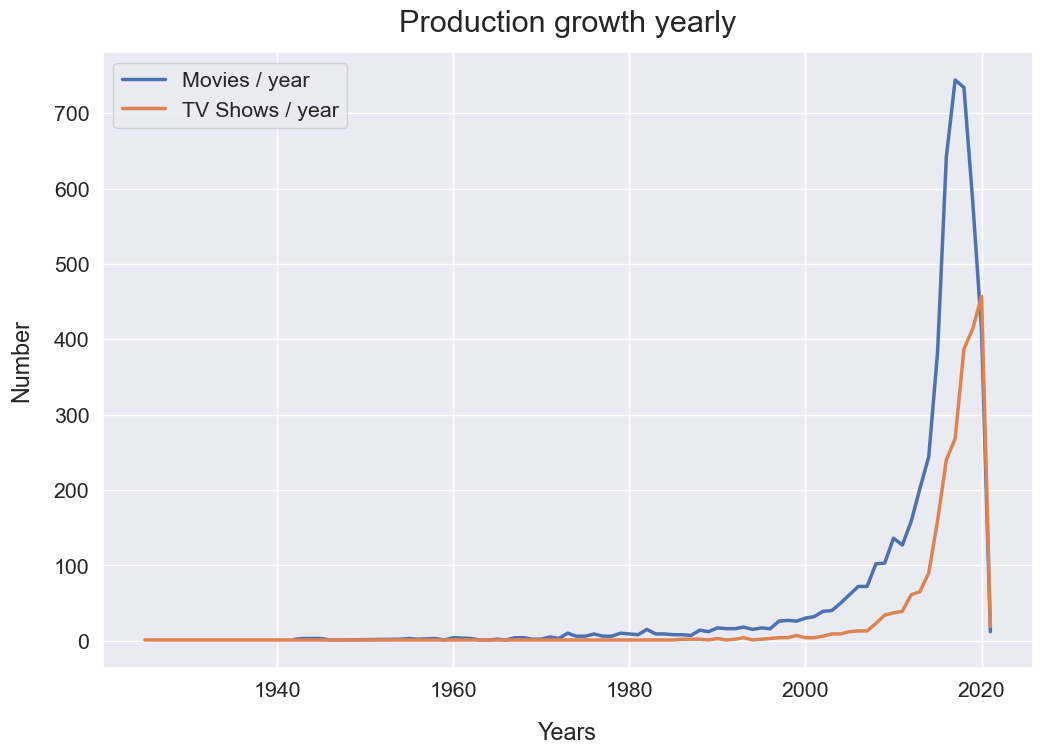

In [352]:
# Chart - 6 visualization code

# visualizing the movies and tv_shows based on the release year


movies_year =movie['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_show['release_year'].value_counts().sort_index(ascending=False)


sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, label="Movies / year")
tvshows_year.plot(figsize=(12, 8), linewidth=2.5,label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22)
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

line plot helps us to identify and see the trend clearly especially over time. My aim is to know the count of total number of contents became available  over time. 


##### 2. What is/are the insight(s) found from the chart?

As we can see that Netflix acheived its peak between 2017 to 2020. This may because of Corona. Because because of corona people stayed in their house which make them to spend more time in internet.So it is clearly understood by Netflix and they make sure to own more contents in that period to attract more subscribers over other OTT platform.

#### Chart - 7

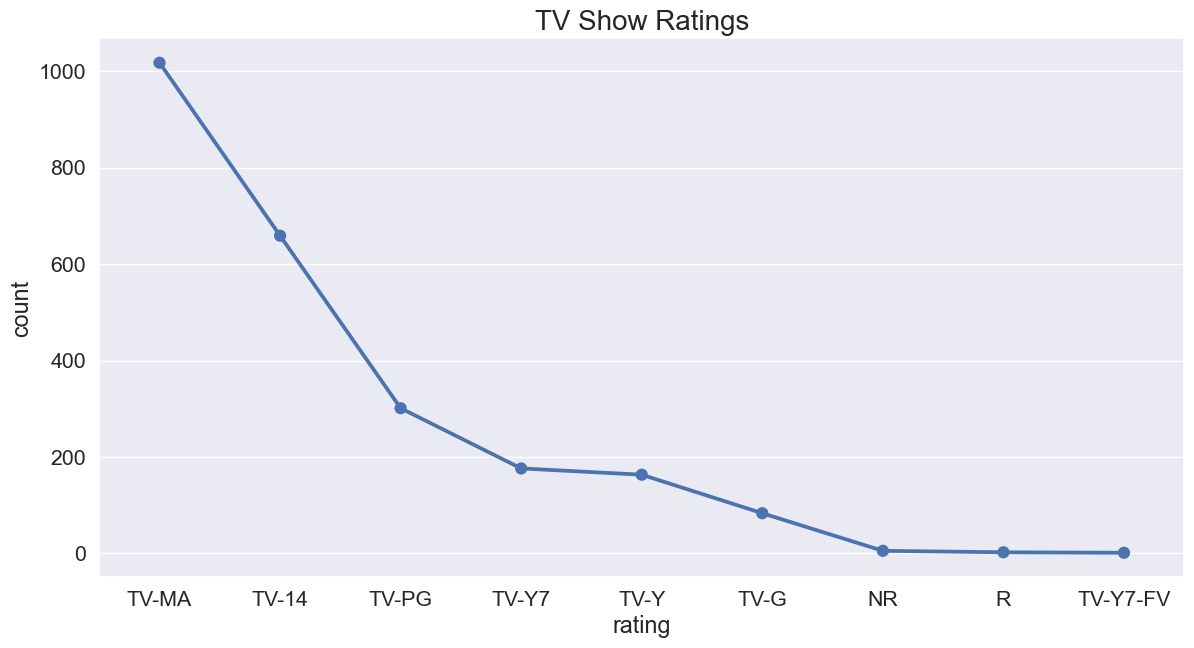

In [349]:
# Chart - 7 visualization code
#Rating based on rating system of all TV Shows

tv_ratings = tv_show.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

line plot helps us to find the trend among different category. Here in this we are counting the total of different movies/tv shows ratings.

##### 2. What is/are the insight(s) found from the chart?

TV-MA rating category content is more available in Netflix and followed by TV-14

#### Chart - 8

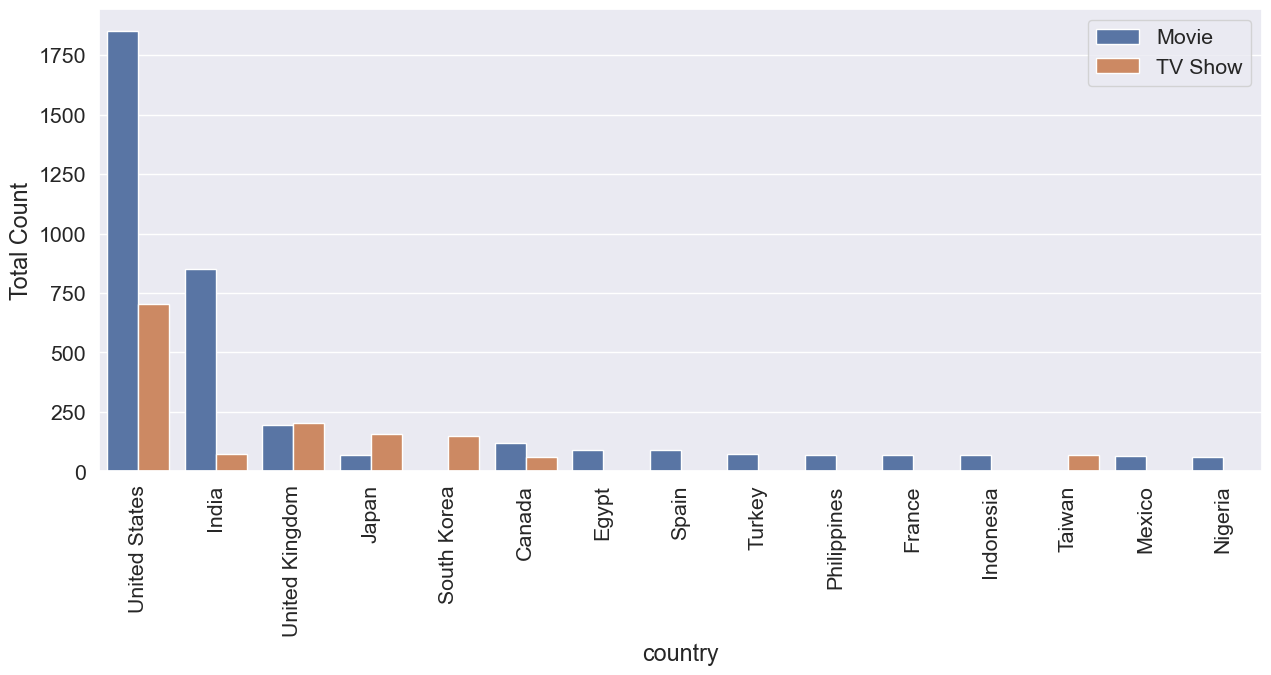

In [357]:
## Chart - 8 visualization code
# Count of TVshow and Movie produced in different country 


df_country = df.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
plt.figure(figsize = (15, 6))
sns.barplot(data = df_country, x = df_country['country'][:20], y = df_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.ylabel('Total Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is Country and on y-axis it is count of TV shows and movies

##### 2. What is/are the insight(s) found from the chart?

As we seen in the word cloud Netflix has more number of United States's Tv shows and Movies. Followed by India, which has highest number of movies and very low number of TV_shows comparing to the others.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***